In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
X_test = pd.read_csv('X_test.csv')
X_train = pd.read_csv('X_train.csv')
X_val = pd.read_csv('X_val.csv')
y_test = pd.read_csv('y_test.csv')
y_train = pd.read_csv('y_train.csv')
y_val = pd.read_csv('y_val.csv')

In [3]:
X_val.head()

,product_id,add_to_cart_order,user_id,order_number,days_since_prior_order,avg_days_since_prior_order,total_orders,avg_products,order_dow_0,order_dow_1,...,department_pets,department_produce,department_snacks,most_common_order_dow_0,most_common_order_dow_1,most_common_order_dow_2,most_common_order_dow_3,most_common_order_dow_4,most_common_order_dow_5,most_common_order_dow_6
0,7649,9,210,63,3.0,3.221311,100,8.868852,0,0,...,0,0,0,1,0,0,0,0,0,0
1,33731,14,462,54,7.0,5.718750,59,10.696970,0,0,...,0,0,0,0,1,0,0,0,0,0
2,43086,4,465,12,1.0,9.378378,41,8.756757,0,1,...,0,1,0,0,0,0,0,0,1,0
3,28204,3,1866,18,4.0,4.044944,97,4.648352,0,0,...,0,1,0,0,0,0,0,0,1,0
4,13263,7,1072,15,6.0,7.100000,15,8.050000,0,1,...,0,0,0,0,1,0,0,0,0,0


In [4]:
y_val.head()

,reordered
0,1
1,1
2,0
3,1
4,1


# Dealing with distribution shift

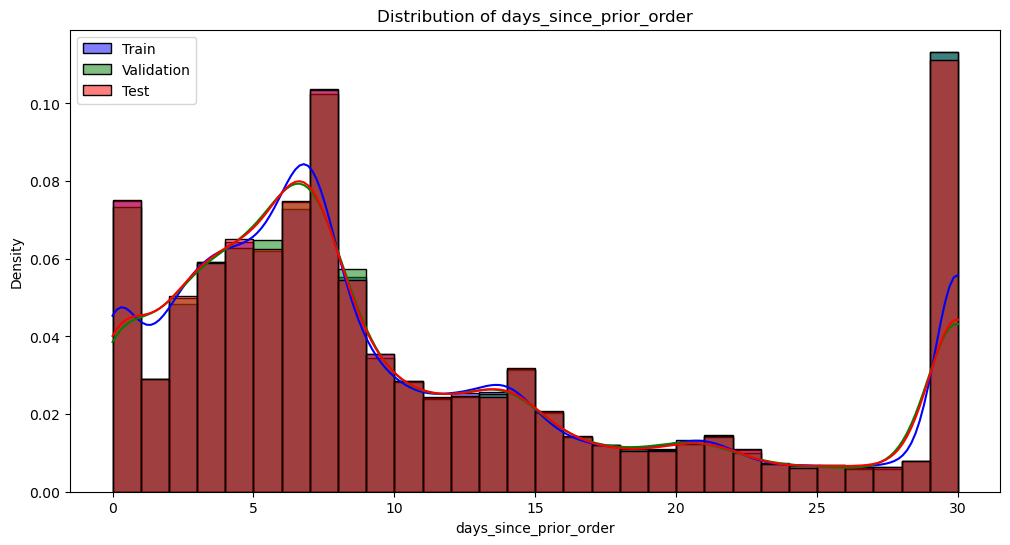

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot distribution comparison for a given feature
def plot_distribution_comparison(feature, bins=30):
    plt.figure(figsize=(12, 6))
    sns.histplot(X_train[feature], color='blue', label='Train', bins=bins, kde=True, stat='density')
    sns.histplot(X_val[feature], color='green', label='Validation', bins=bins, kde=True, stat='density')
    sns.histplot(X_test[feature], color='red', label='Test', bins=bins, kde=True, stat='density')
    plt.legend()
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()

# Plotting distribution comparison for 'days_since_prior_order'
plot_distribution_comparison('days_since_prior_order')


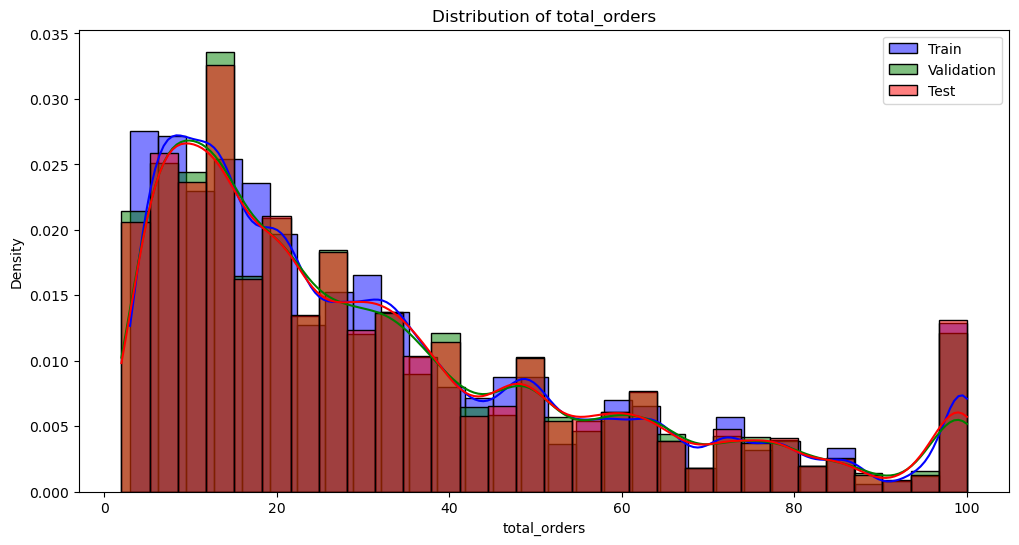

In [6]:
# Plotting distribution comparison for 'total_orders'
plot_distribution_comparison('total_orders')

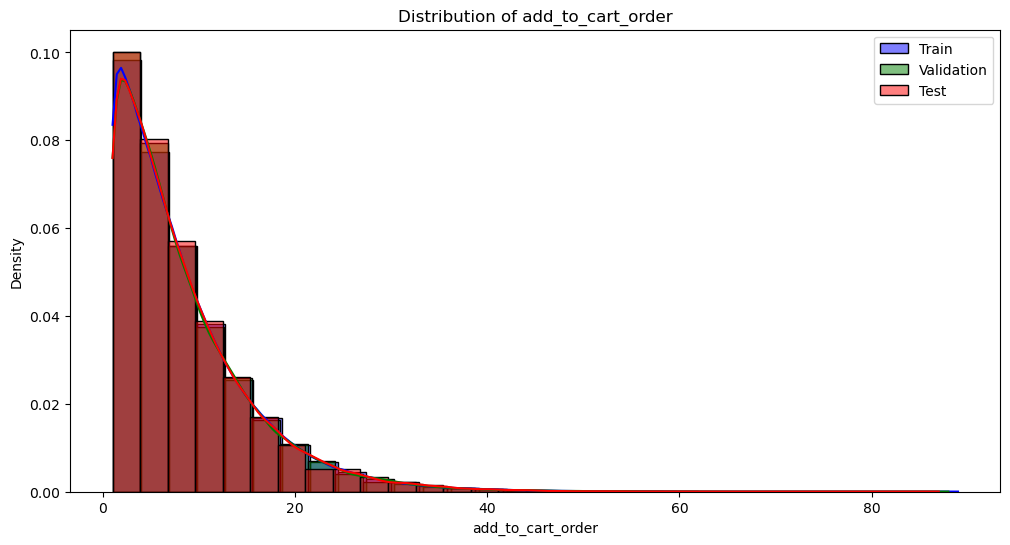

In [7]:
# Plotting distribution comparison for 'add_to_cart_order'
plot_distribution_comparison('add_to_cart_order')

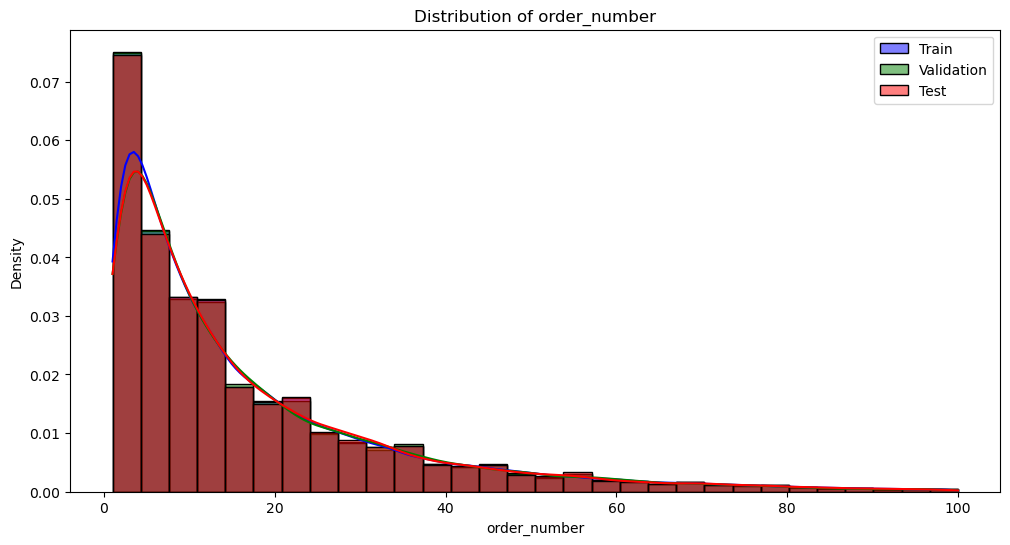

In [8]:
# Plotting distribution comparison for 'order_number'
plot_distribution_comparison('order_number')

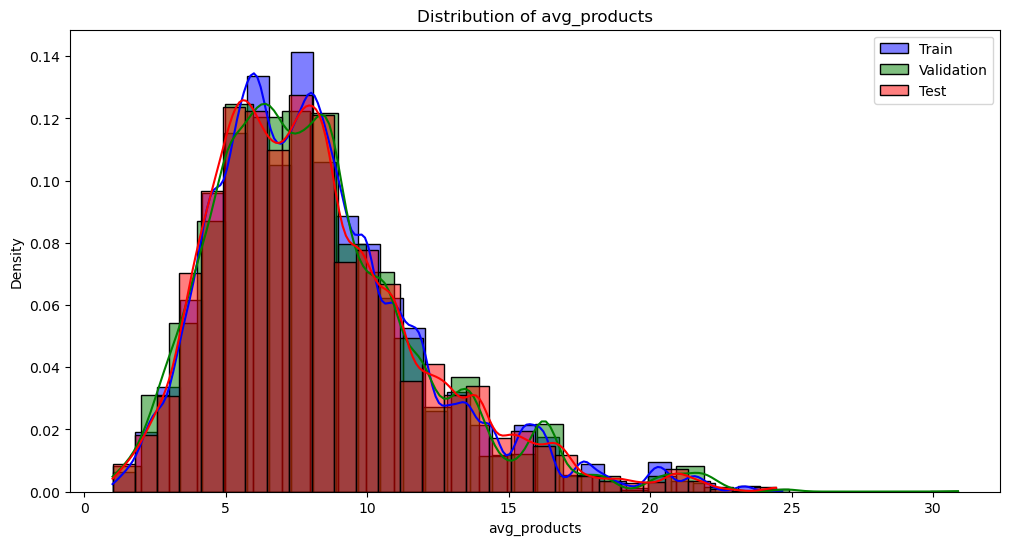

In [9]:
# Plotting distribution comparison for 'avg_products'
plot_distribution_comparison('avg_products')

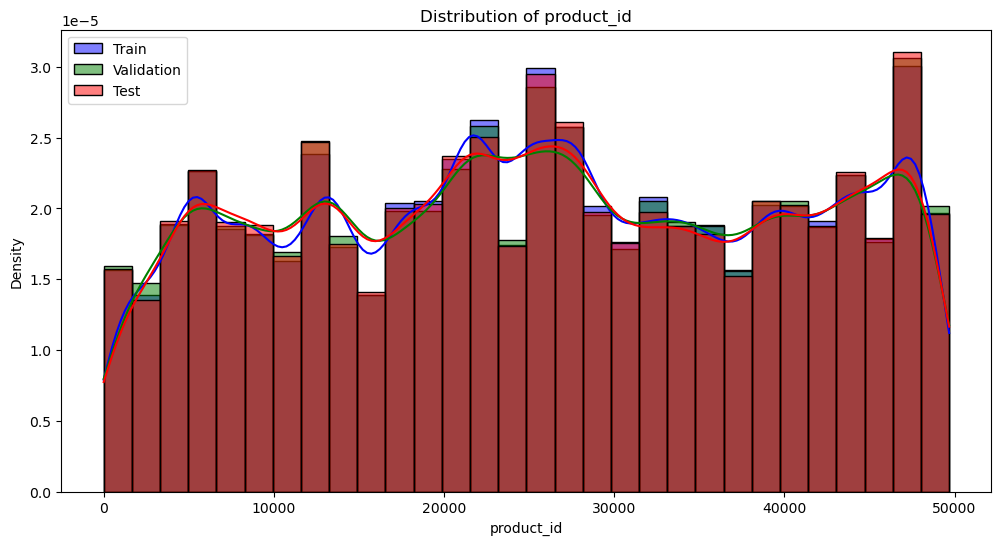

In [10]:
# Plotting distribution comparison for 'product_id'
plot_distribution_comparison('product_id')

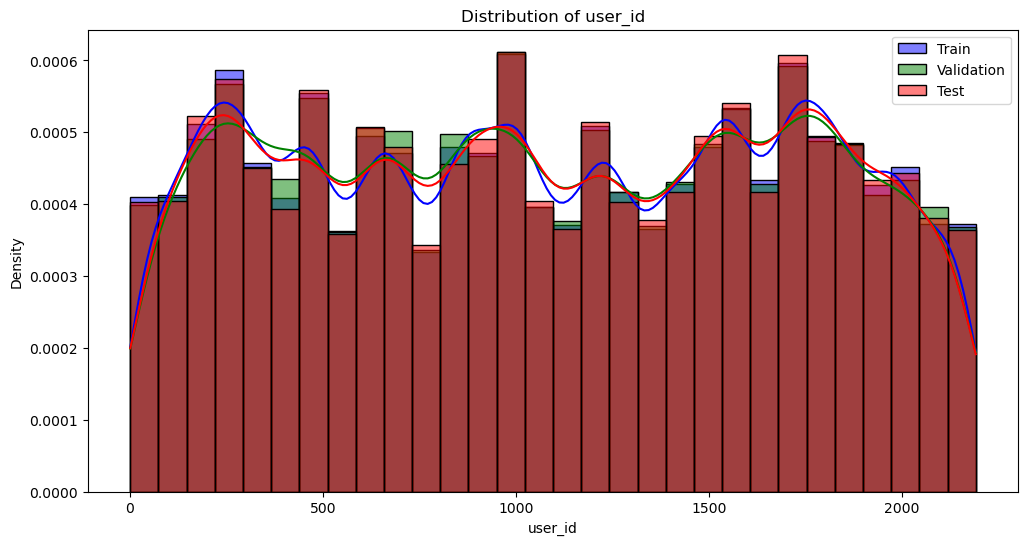

In [11]:
# Plotting distribution comparison for 'user_id'
plot_distribution_comparison('user_id')

In [12]:
from scipy.stats import ks_2samp

features = ['add_to_cart_order', 'order_number', 'days_since_prior_order', 'total_orders','product_id', 'user_id']

def compare_distributions(feature):
    stat, p_value = ks_2samp(X_train[feature], X_val[feature])
    print(f"Kolmogorov-Smirnov test for {feature} between Train and Validation: Statistic={stat:.4f}, P-value={p_value:.4f}")

    stat, p_value = ks_2samp(X_train[feature], X_test[feature])
    print(f"Kolmogorov-Smirnov test for {feature} between Train and Test: Statistic={stat:.4f}, P-value={p_value:.4f}")

for feature in features:
    compare_distributions(feature)



Kolmogorov-Smirnov test for add_to_cart_order between Train and Validation: Statistic=0.0062, P-value=0.0741
Kolmogorov-Smirnov test for add_to_cart_order between Train and Test: Statistic=0.0023, P-value=0.9431
Kolmogorov-Smirnov test for order_number between Train and Validation: Statistic=0.0017, P-value=0.9996
Kolmogorov-Smirnov test for order_number between Train and Test: Statistic=0.0039, P-value=0.3998
Kolmogorov-Smirnov test for days_since_prior_order between Train and Validation: Statistic=0.0044, P-value=0.3691
Kolmogorov-Smirnov test for days_since_prior_order between Train and Test: Statistic=0.0056, P-value=0.0811
Kolmogorov-Smirnov test for total_orders between Train and Validation: Statistic=0.0094, P-value=0.0010
Kolmogorov-Smirnov test for total_orders between Train and Test: Statistic=0.0063, P-value=0.0326
Kolmogorov-Smirnov test for product_id between Train and Validation: Statistic=0.0073, P-value=0.0188
Kolmogorov-Smirnov test for product_id between Train and Tes

In [13]:
# Downsample the train set to match the distribution of the validation set for 'total_orders'
train_indices = X_train['total_orders'].sample(n=len(X_val), random_state=42).index
X_train_resampled = X_train.loc[train_indices]
y_train_resampled = y_train.loc[train_indices]

from scipy.stats import ks_2samp

def compare_distributions_resampled(feature, X_train_resampled, X_val, X_test):
    stat, p_value = ks_2samp(X_train_resampled[feature], X_val[feature])
    print(f"Kolmogorov-Smirnov test for {feature} between Resampled Train and Validation: Statistic={stat:.4f}, P-value={p_value:.4f}")

    stat, p_value = ks_2samp(X_train_resampled[feature], X_test[feature])
    print(f"Kolmogorov-Smirnov test for {feature} between Resampled Train and Test: Statistic={stat:.4f}, P-value={p_value:.4f}")

compare_distributions_resampled('total_orders', X_train_resampled, X_val, X_test)


Kolmogorov-Smirnov test for total_orders between Resampled Train and Validation: Statistic=0.0111, P-value=0.0027
Kolmogorov-Smirnov test for total_orders between Resampled Train and Test: Statistic=0.0081, P-value=0.0379


In [14]:
# Downsample the train set to match the distribution of the validation set for 'product_id'
train_indices = X_train['product_id'].sample(n=len(X_val), random_state=42).index
X_train_resampled = X_train.loc[train_indices]
y_train_resampled = y_train.loc[train_indices]

from scipy.stats import ks_2samp

def compare_distributions_resampled(feature, X_train_resampled, X_val, X_test):
    stat, p_value = ks_2samp(X_train_resampled[feature], X_val[feature])
    print(f"Kolmogorov-Smirnov test for {feature} between Resampled Train and Validation: Statistic={stat:.4f}, P-value={p_value:.4f}")

    stat, p_value = ks_2samp(X_train_resampled[feature], X_test[feature])
    print(f"Kolmogorov-Smirnov test for {feature} between Resampled Train and Test: Statistic={stat:.4f}, P-value={p_value:.4f}")

compare_distributions_resampled('product_id', X_train_resampled, X_val, X_test)

Kolmogorov-Smirnov test for product_id between Resampled Train and Validation: Statistic=0.0048, P-value=0.5629
Kolmogorov-Smirnov test for product_id between Resampled Train and Test: Statistic=0.0038, P-value=0.7876


# Handling imbalanced datasets for the training data

In [15]:
import pandas as pd

class_distribution = y_train['reordered'].value_counts(normalize=True)
print(class_distribution)

1    0.583513
0    0.416487
Name: reordered, dtype: float64


In [16]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Convert y_resampled to a numpy array
y_resampled_array = y_resampled.to_numpy().ravel()

# Convert y_resampled_array to a pandas Series
y_resampled_series = pd.Series(y_resampled_array)

class_distribution_resampled = y_resampled_series.value_counts(normalize=True)
print(class_distribution_resampled)


0    0.5
1    0.5
dtype: float64


# Correlations

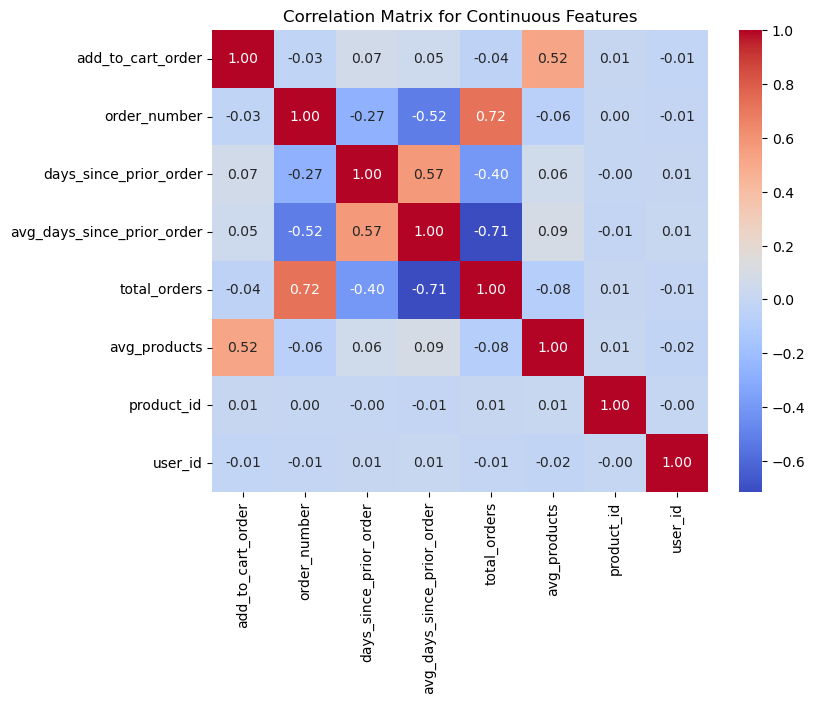

In [17]:
# Select continuous features
continuous_features = ['add_to_cart_order','order_number', 
                       'days_since_prior_order', 'avg_days_since_prior_order', 'total_orders', 'avg_products', 'product_id', 'user_id'] 

corr_continuous = X_train[continuous_features].corr()

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_continuous, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix for Continuous Features')
plt.show()


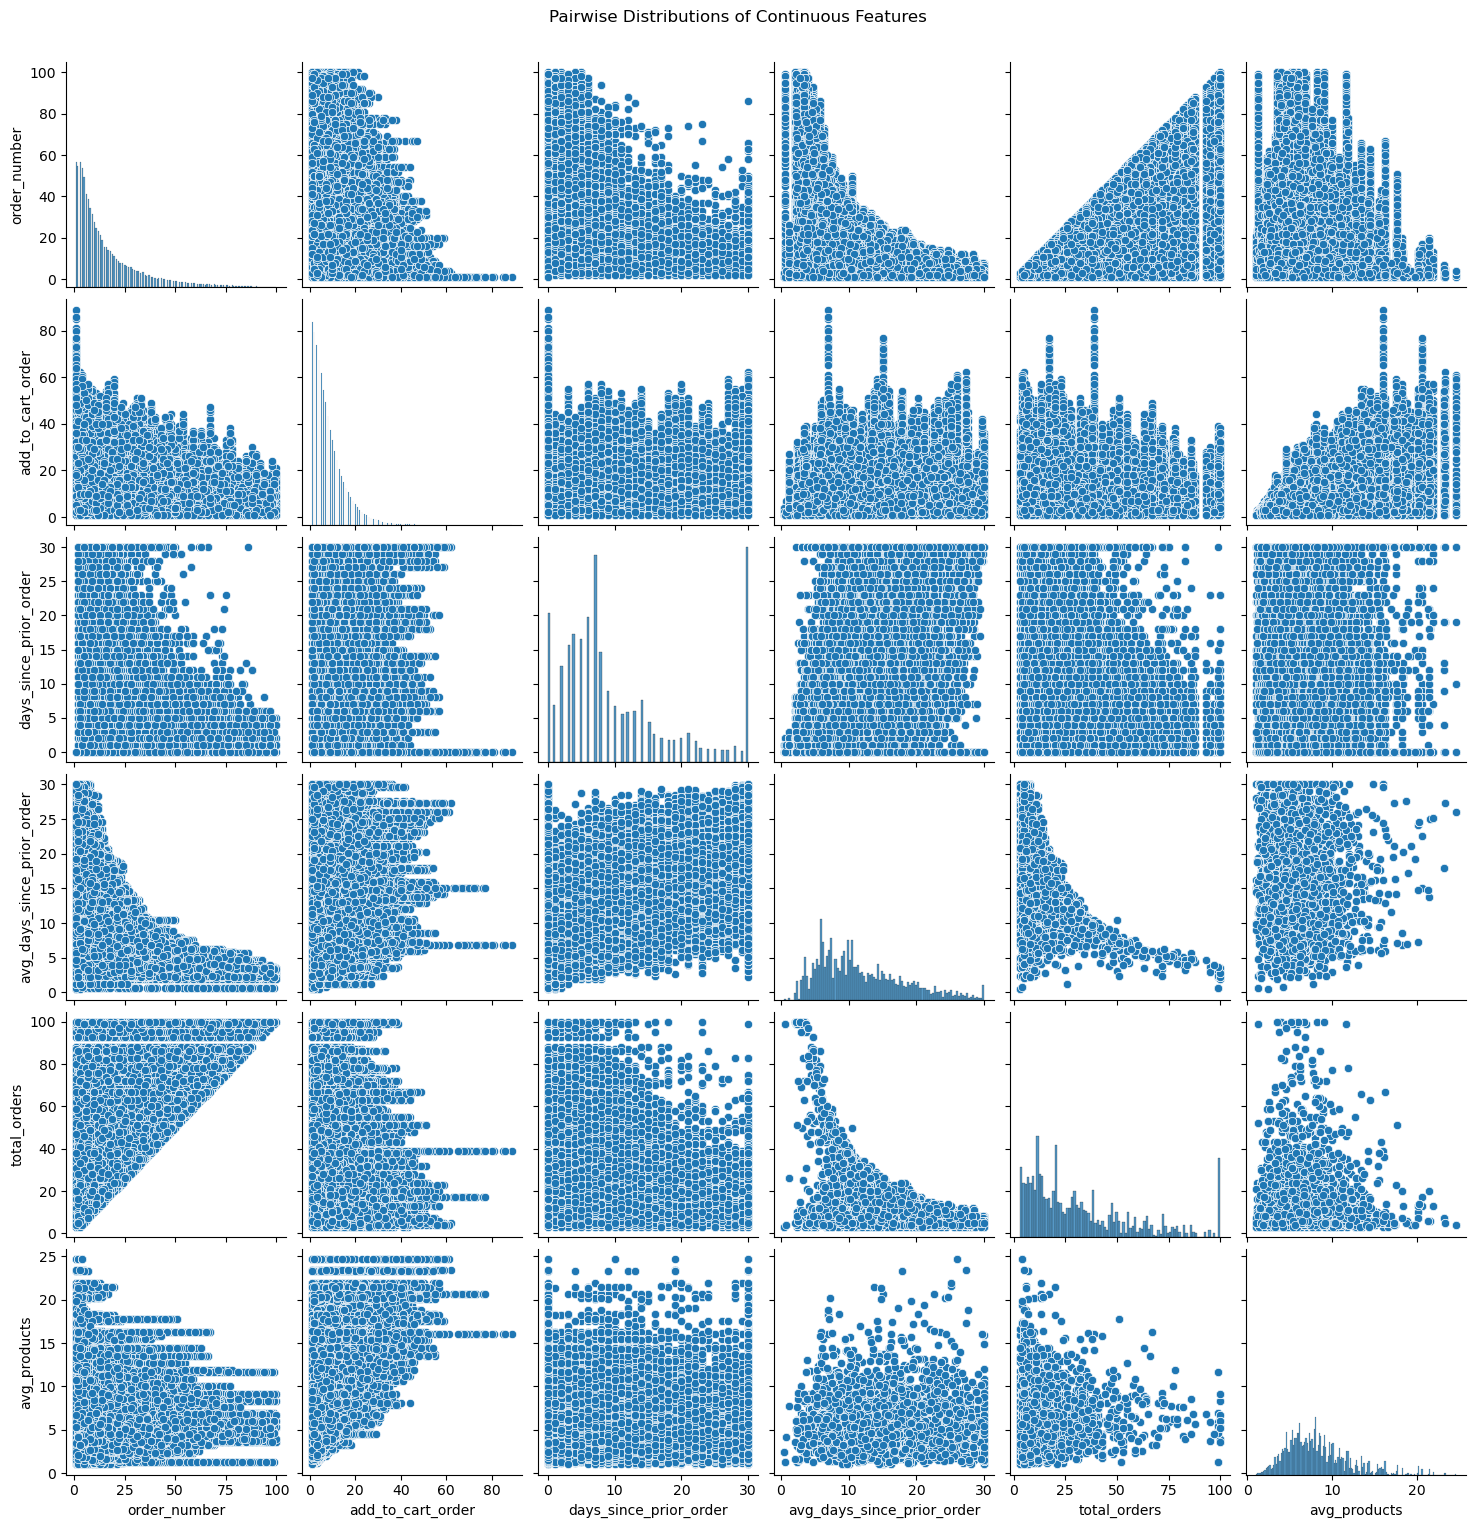

In [18]:
# pairplot to visualize pairwise relationships between the features
features = ['order_number', 'add_to_cart_order', 'days_since_prior_order', 'avg_days_since_prior_order', 'total_orders', 'avg_products']
sns.pairplot(X_train[features])
plt.suptitle('Pairwise Distributions of Continuous Features', y=1.02)
plt.show()


# Distributions

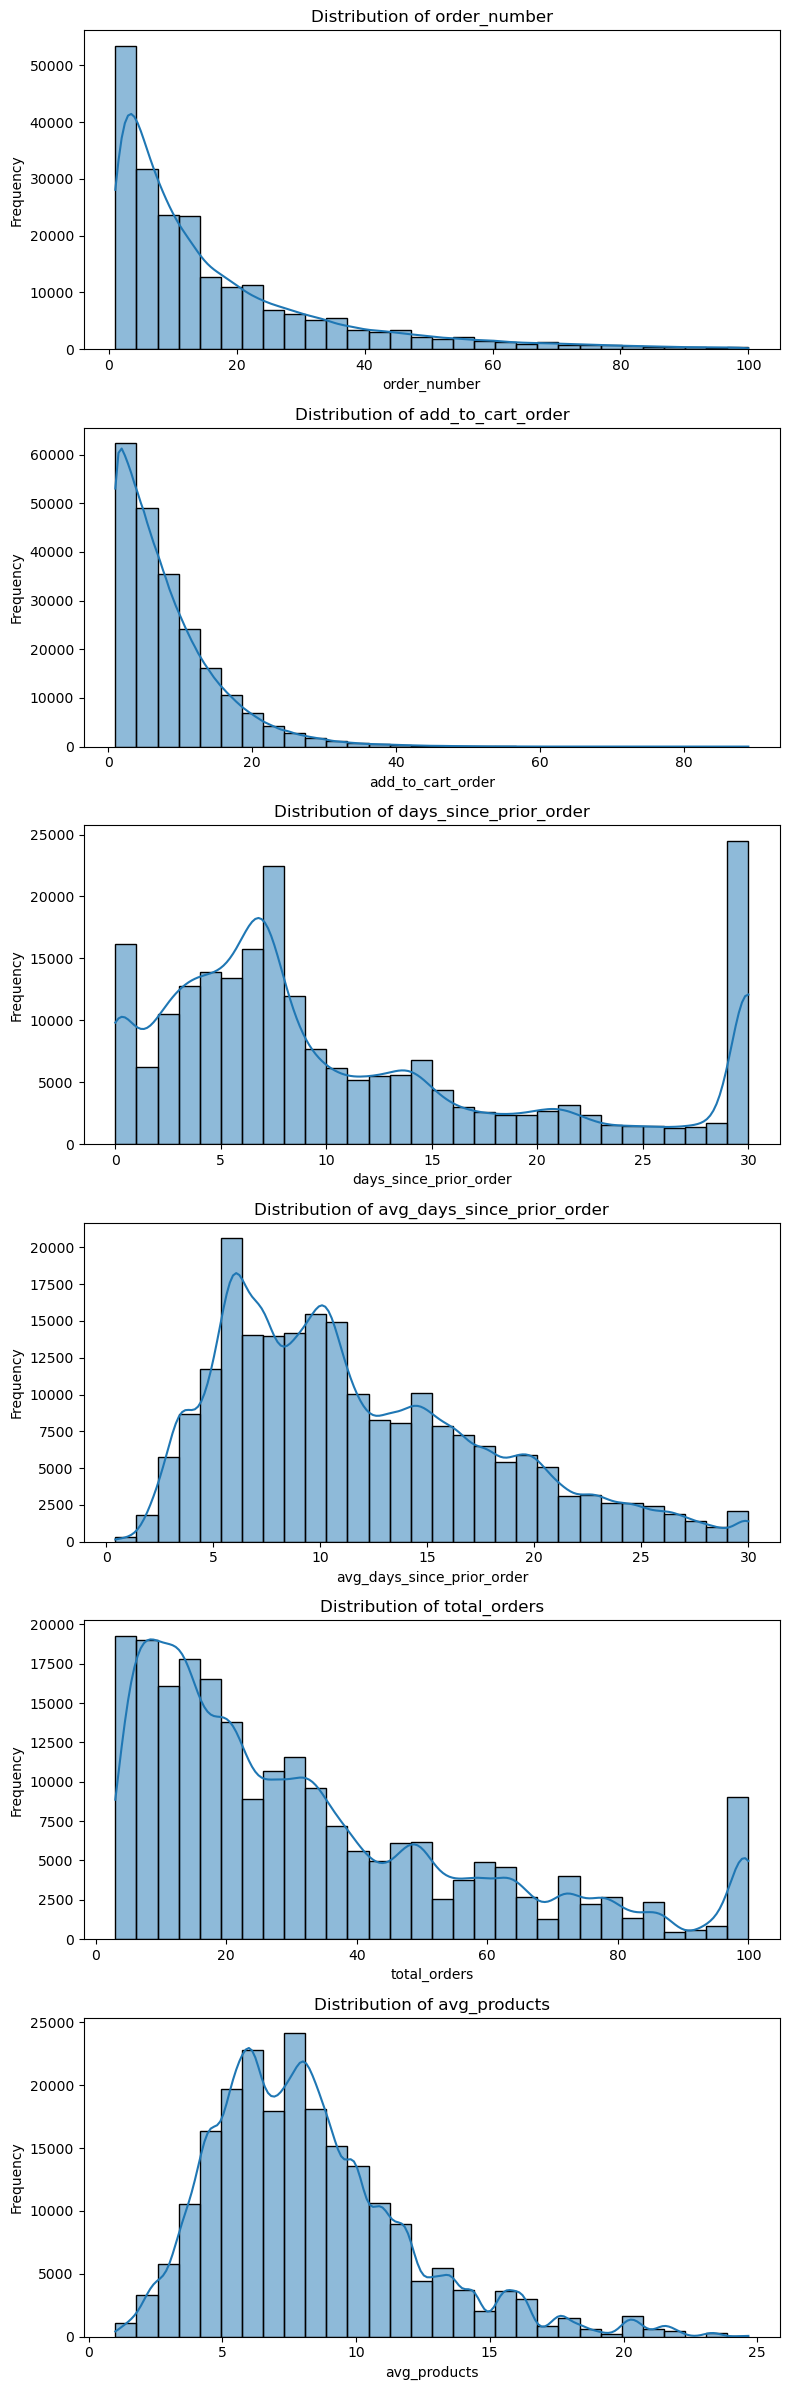

In [19]:
# Distribution of Features
n_features = len(features)
fig, axes = plt.subplots(n_features, 1, figsize=(8, 4 * n_features))

for i, feature in enumerate(features):
    sns.histplot(X_train[feature], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


# Densities

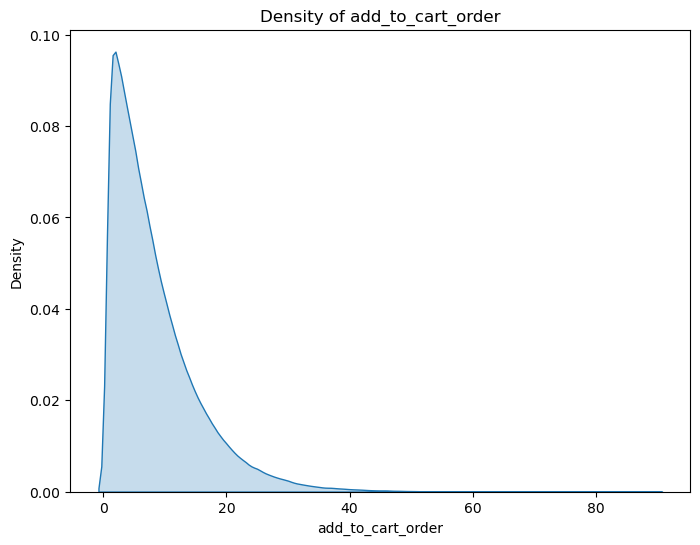

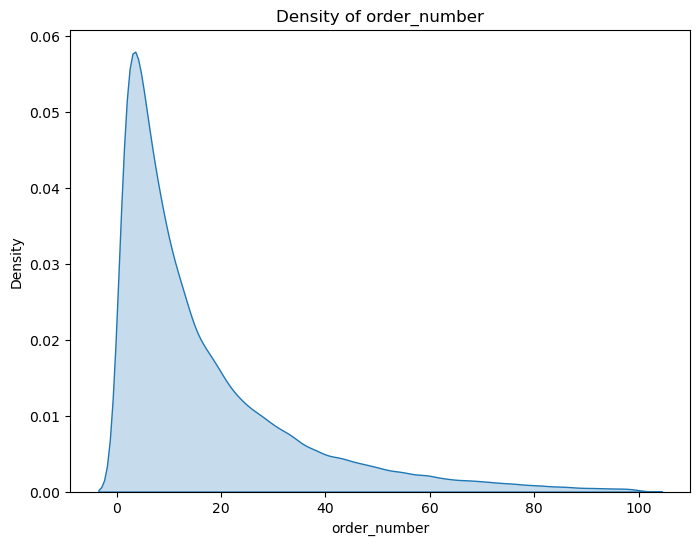

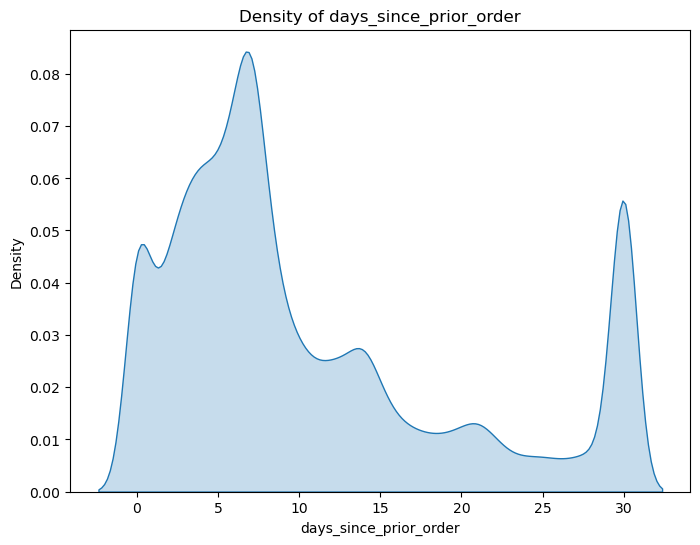

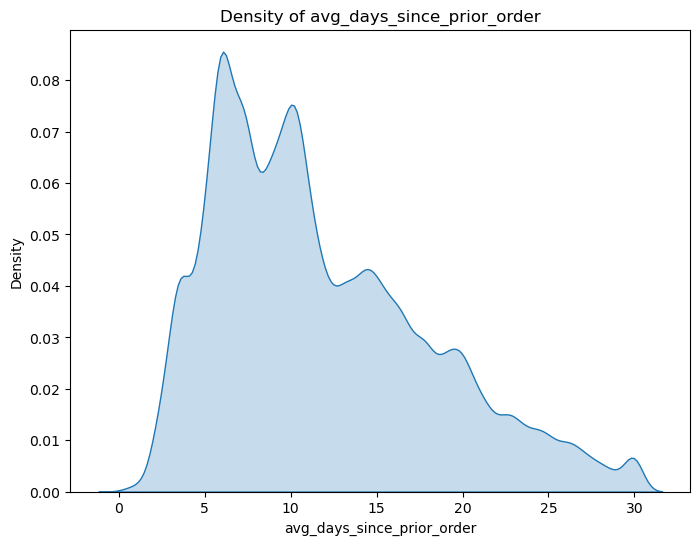

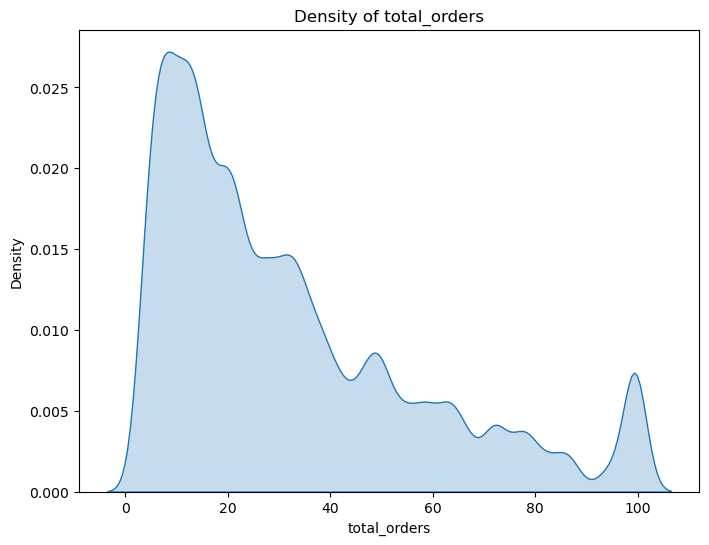

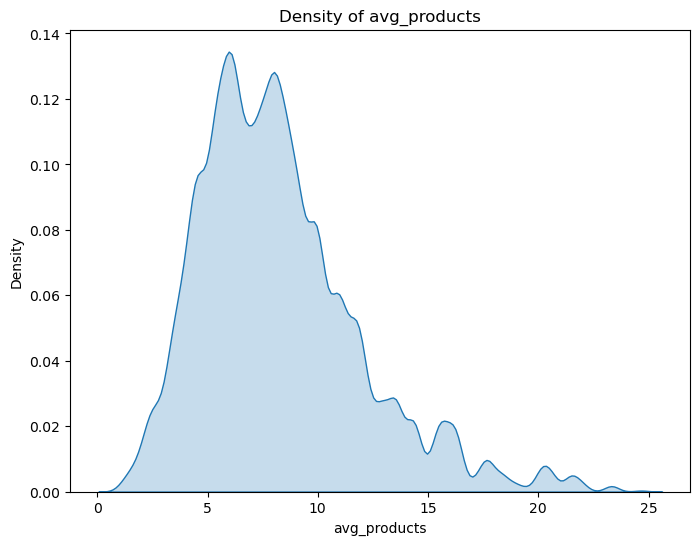

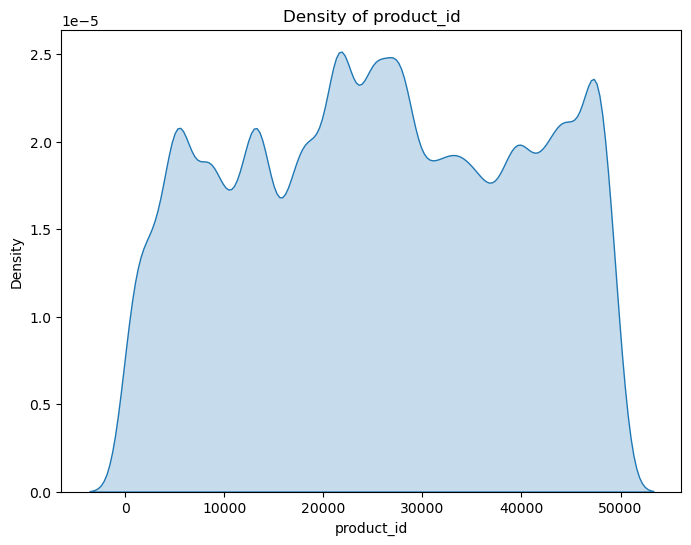

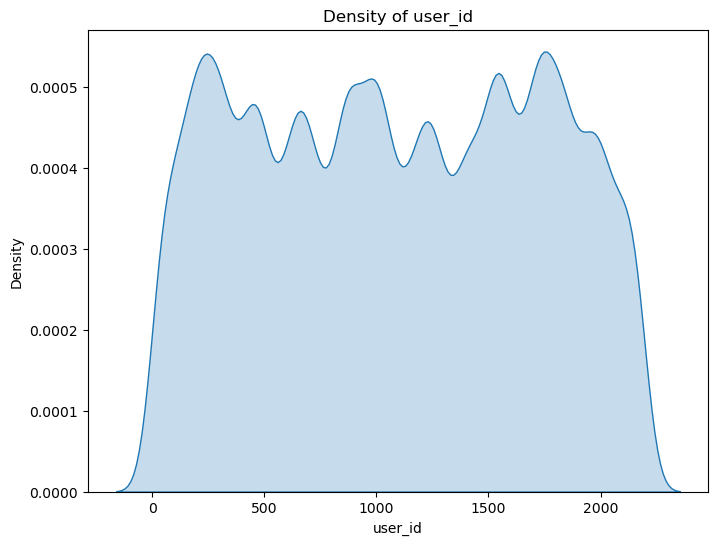

In [20]:
for feature in continuous_features:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(X_train[feature], shade=True)
    plt.title(f'Density of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()


# Information Leakage Analysis

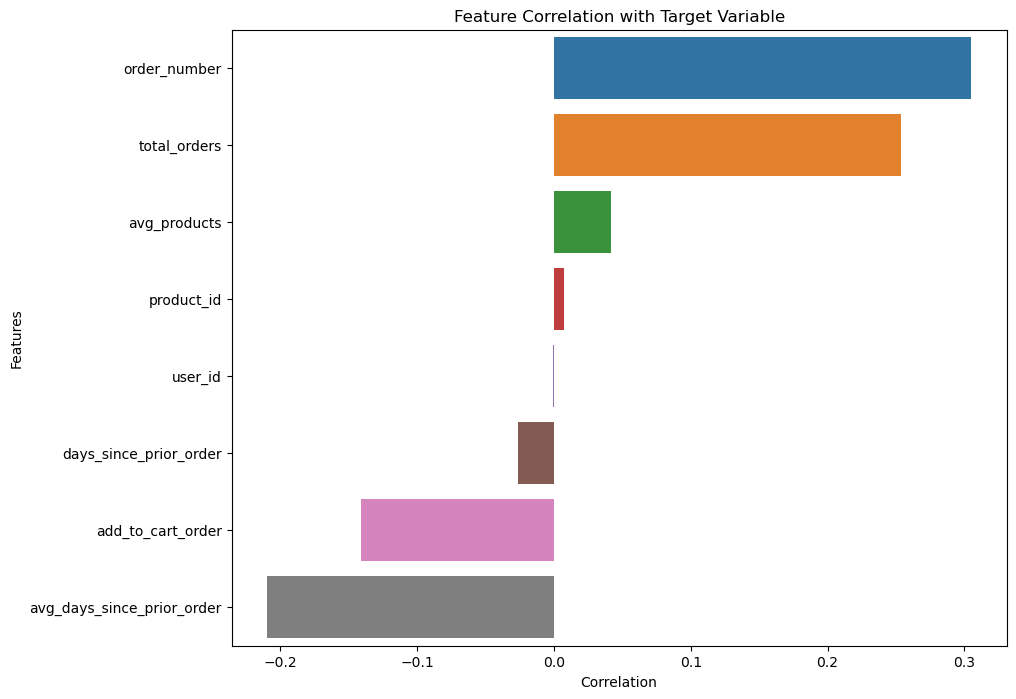

In [21]:
# Compute the correlation between features and the target variable
correlations = X_train[continuous_features].corrwith(y_train['reordered'])
correlations = correlations.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=correlations.values, y=correlations.index)
plt.title('Feature Correlation with Target Variable')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.show()


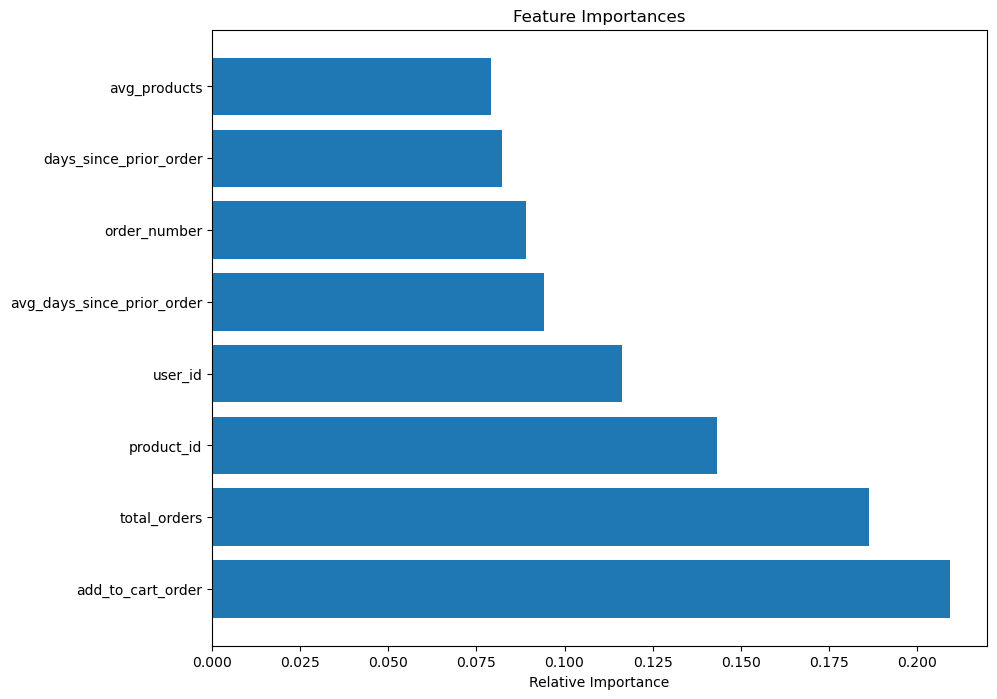

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train[continuous_features], y_train['reordered'])

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### There are no features have surprisingly high importance score compared to our expectations. In addition, if there are features that are highly correlated with the target variable, that might be leaking information. Based on the output, we found that there are no features that are very highly correlated with the target variable. Therefore, by combining above results, there is no risk of imformation leakage.